In [ ]:
# TBC duomenys
# https://data.gov.lt/datasets/2871/

# (tuberkulioze – rūkymas, gėrimas,
# lytis, TLK kodas, mirties data)

# Ar yra priklausomybė tarp gyvenimo
# trukmės ir TBC žalingų įpročių? Pateikite TBC sergančiųjų
# duomenų apžvalgą: pasiskirstymas pagal lytį, amžių,
# rūkymo/alkoholio vart. stažą. Parašykite skriptą, kuris
# prognozuotų tikėtiną paciento gyvenimo trukmę

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [3]:
df = pd.read_csv(r"C:\Users\Batia\Downloads\TubPacientoZalingasIprotis.csv")

C:\Users\Batia\AppData\Local\Temp\ipykernel_11196\3523113220.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Batia\Downloads\TubPacientoZalingasIprotis.csv")


In [4]:
df

,_type,_id,_revision,_page.next,paciento_id,paciento_vardas,paciento_pavarde,paciento_gim_data,paciento_asmens_kodas,vda_ak_validacija,...,rukymas_id,rukymas_reiksme,rukymo_stazas_id,rukymo_stazas_reiksme,alkoholis_id,alkoholis_reiksme,vda_ligos_kodai,ligos_kodas,ar_mire_nuo_tub,mirties_nuo_tub_d
0,datasets/gov/santara/tub_pacientu_zalingi_ipro...,da2bbb1c-2884-48bc-bdfd-19b27ff97025,76cab5cc-7551-4c30-8df1-537f5c036a5a,NaN,000254ba808ae65,7a0f681b673018a,2a925dd8f6a43f2,cf71c293a267455,2e0500a37929dcc,Tinkamas,...,2.0,11-20 cigarečių per dieną,3.0,11 - 20 metų,1.0,Nevartoja,A15d,A15d,NaN,NaN
1,datasets/gov/santara/tub_pacientu_zalingi_ipro...,eb2639f9-29b6-4d6c-888b-5eb2506dbb19,c3d871f4-5b93-4d88-aaae-0a6e9fe7daf3,NaN,0002a198424b859,d69d675af2a2fef,743a21b9b51c547,565e6a3a976e20a,aa6024f3d69f070,Tinkamas,...,4.0,Nerūko,0.0,NaN,2.0,Vartoja retai,A19.1,A19.1,NaN,NaN
2,datasets/gov/santara/tub_pacientu_zalingi_ipro...,63712b95-d93c-4f25-8e0e-117822d05575,92c2ea5d-851e-4739-a504-da8cf375f0f7,NaN,00043169b1fdc6c,fcd863544e185ea,8d78f1941f5609b,0cf907d261a93b3,97fdc9b065f1ab7,Tinkamas,...,2.0,11-20 cigarečių per dieną,4.0,Virš 20 metų,2.0,Vartoja retai,A15,A15,False,NaN
3,datasets/gov/santara/tub_pacientu_zalingi_ipro...,de235944-0298-49b9-a9cb-28669c44f160,b5a7d3ac-76b2-4c25-8a50-66bb7d7a766c,NaN,000484e8a1387ee,f33bd8003b8283b,da260f7c627cd29,80ccd1882320355,a9f4072abb2d398,Tinkamas,...,4.0,Nerūko,0.0,NaN,1.0,Nevartoja,A16,A16,False,NaN
4,datasets/gov/santara/tub_pacientu_zalingi_ipro...,57150a0b-0f48-408c-8ab2-7812e7cb39f0,edac734d-572d-4cbe-8b11-3a727d5c3f9e,NaN,000579c499e4957,437c46e3f493fe6,8eb924fce554593,25b43e589208bc9,158691c02a48664,Tinkamas,...,3.0,Virš 20 cigarečių per dieną,4.0,Virš 20 metų,3.0,Girtauja,A15.1,A15.1,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52128,datasets/gov/santara/tub_pacientu_zalingi_ipro...,a1d5b307-b8da-4868-a61c-f31169c77375,7961f9c7-e12a-46c8-a465-733678758309,NaN,fff470b680dbd61,9d59d26bf42e7ff,710b2ac63404fd3,ca87f227d737ac5,835fd708c8b5d7a,Tinkamas,...,4.0,Nerūko,0.0,NaN,1.0,Nevartoja,A15.1d,A15.1d,True,2004-04-10
52129,datasets/gov/santara/tub_pacientu_zalingi_ipro...,32a8569c-fe6b-45ef-9050-98ad5a9f10ae,83863300-c9bd-4602-81e7-c2b1574ca5ff,NaN,fff85dbf9aac42f,95e0bd798db4b64,1e2883c18da0c62,66fd2131f42605c,bc220e118195e11,Netinkamas kontrolinis skaitmuo,...,1.0,Iki 10 cigarečių per dieną,3.0,11 - 20 metų,3.0,Girtauja,A16,A16,False,NaN
52130,datasets/gov/santara/tub_pacientu_zalingi_ipro...,45fd1019-a254-4768-9d02-526f3f387cef,5669cbc5-2746-49c3-9b20-3ca5d3d723b4,NaN,fff996795579760,00a8d7c0a60ac1e,ffa6dbb40ddbfcf,1de50bea52cdc2a,1eb5da798992a8f,Tinkamas,...,4.0,Nerūko,0.0,NaN,3.0,Girtauja,A16,A16,False,NaN
52131,datasets/gov/santara/tub_pacientu_zalingi_ipro...,5f7255df-3a16-4097-a912-b436df7cd65e,ab35895b-0d93-4526-940c-4750a773af87,NaN,fffba6e39104485,490cb1a00aeaba4,43076bc88937b23,3ad6da66e64c810,b04b2d920d22b7d,Tinkamas,...,1.0,Iki 10 cigarečių per dieną,4.0,Virš 20 metų,2.0,Vartoja retai,A16,A16,False,NaN


In [ ]:

columns_to_keep = [
    "paciento_gim_metai", "rukymas_reiksme", "rukymo_stazas_reiksme",
    "alkoholis_reiksme", "ligos_kodas", "ar_mire_nuo_tub", "mirties_nuo_tub_d"
]
cleaned_data = df[columns_to_keep]


cleaned_data.info()
cleaned_data.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52133 entries, 0 to 52132
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   paciento_gim_metai     52114 non-null  object
 1   rukymas_reiksme        52031 non-null  object
 2   rukymo_stazas_reiksme  29843 non-null  object
 3   alkoholis_reiksme      52038 non-null  object
 4   ligos_kodas            52133 non-null  object
 5   ar_mire_nuo_tub        45211 non-null  object
 6   mirties_nuo_tub_d      6428 non-null   object
dtypes: object(7)
memory usage: 2.8+ MB


,paciento_gim_metai,rukymas_reiksme,rukymo_stazas_reiksme,alkoholis_reiksme,ligos_kodas,ar_mire_nuo_tub,mirties_nuo_tub_d
count,52114,52031,29843,52038,52133,45211,6428
unique,124,5,4,4,33,2,4429
top,1960-01-01,Nerūko,Virš 20 metų,Vartoja retai,A15,False,2007-07-12
freq,1272,22035,13220,19931,17649,40583,12


In [16]:
from datetime import datetime


def calculate_age(birth_date):
    try:
        birth_date = datetime.strptime(birth_date, "%Y-%m-%d")
        today = datetime.now()
        return today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    except:
        return None

cleaned_data["amzius"] = cleaned_data["paciento_gim_metai"].apply(calculate_age)


summary = cleaned_data[["amzius", "rukymas_reiksme", "alkoholis_reiksme", "ar_mire_nuo_tub"]].describe(include="all")



C:\Users\Batia\AppData\Local\Temp\ipykernel_11196\3031073681.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["amzius"] = cleaned_data["paciento_gim_metai"].apply(calculate_age)


C:\Users\Batia\AppData\Local\Temp\ipykernel_11196\1664595873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["amzius"] = pd.to_numeric(cleaned_data["amzius"], errors="coerce")


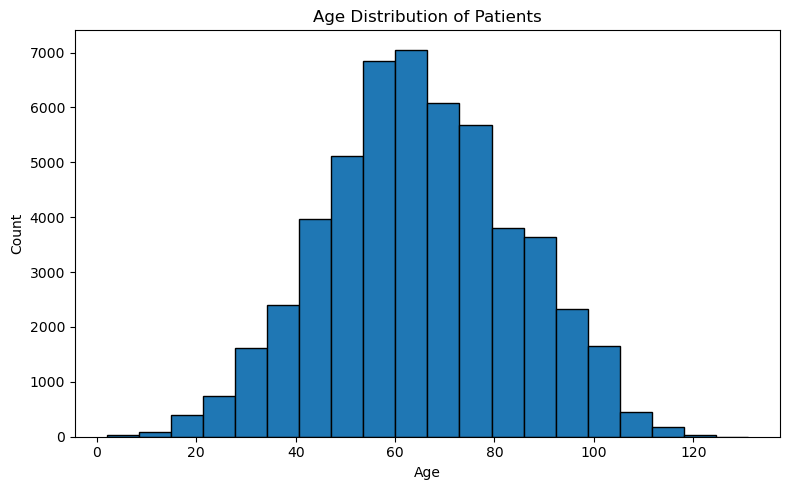

In [ ]:
cleaned_data["amzius"] = pd.to_numeric(cleaned_data["amzius"], errors="coerce")


plt.figure(figsize=(8, 5))
cleaned_data["amzius"].dropna().plot(kind="hist", bins=20, edgecolor="black")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\Batia\AppData\Local\Temp\ipykernel_11196\3476406482.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["gyvenimo_trukme"] = cleaned_data.apply(calculate_lifespan, axis=1)


<Figure size 800x500 with 0 Axes>

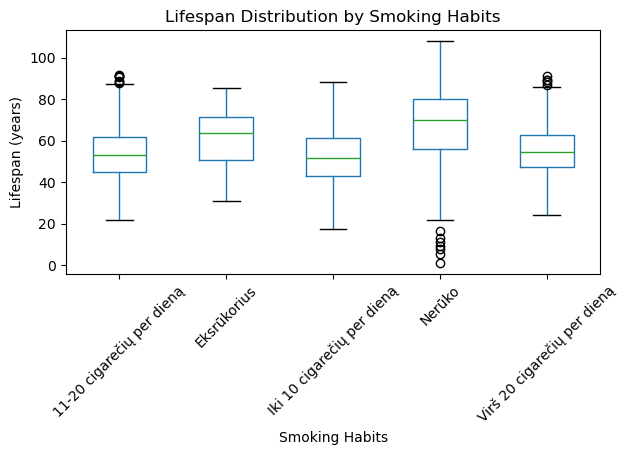

<Figure size 800x500 with 0 Axes>

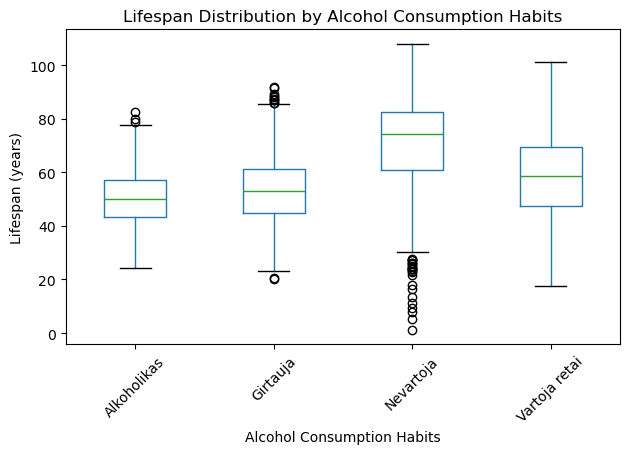

In [ ]:
def calculate_lifespan(row):
    try:
        death_date = datetime.strptime(row["mirties_nuo_tub_d"], "%Y-%m-%d")
        birth_date = datetime.strptime(row["paciento_gim_metai"], "%Y-%m-%d")
        return (death_date - birth_date).days / 365.25  
    except:
        return None


cleaned_data["gyvenimo_trukme"] = cleaned_data.apply(calculate_lifespan, axis=1)


plt.figure(figsize=(8, 5))
cleaned_data.boxplot(column="gyvenimo_trukme", by="rukymas_reiksme", grid=False)
plt.title("Lifespan Distribution by Smoking Habits")
plt.suptitle("")
plt.xlabel("Smoking Habits")
plt.ylabel("Lifespan (years)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
cleaned_data.boxplot(column="gyvenimo_trukme", by="alkoholis_reiksme", grid=False)
plt.title("Lifespan Distribution by Alcohol Consumption Habits")
plt.suptitle("")
plt.xlabel("Alcohol Consumption Habits")
plt.ylabel("Lifespan (years)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
def strict_calculate_lifespan(row):
    try:
        death_date = datetime.strptime(row["mirties_nuo_tub_d"], "%Y-%m-%d")
        birth_date = datetime.strptime(row["paciento_gim_metai"], "%Y-%m-%d")
        lifespan = (death_date - birth_date).days / 365.25
        return lifespan if lifespan > 0 else None
    except:
        return None

In [24]:
cleaned_data

,paciento_gim_metai,rukymas_reiksme,rukymo_stazas_reiksme,alkoholis_reiksme,ligos_kodas,ar_mire_nuo_tub,mirties_nuo_tub_d,amzius,gyvenimo_trukme
0,1978-01-01,11-20 cigarečių per dieną,11 - 20 metų,Nevartoja,A15d,NaN,NaN,47.0,NaN
1,1967-01-01,Nerūko,NaN,Vartoja retai,A19.1,NaN,NaN,58.0,NaN
2,1952-01-01,11-20 cigarečių per dieną,Virš 20 metų,Vartoja retai,A15,False,NaN,73.0,NaN
3,1919-01-01,Nerūko,NaN,Nevartoja,A16,False,NaN,106.0,NaN
4,1937-01-01,Virš 20 cigarečių per dieną,Virš 20 metų,Girtauja,A15.1,False,NaN,88.0,NaN
...,...,...,...,...,...,...,...,...,...
52128,1959-01-01,Nerūko,NaN,Nevartoja,A15.1d,True,2004-04-10,66.0,45.273101
52129,1914-01-01,Iki 10 cigarečių per dieną,11 - 20 metų,Girtauja,A16,False,NaN,111.0,NaN
52130,1931-01-01,Nerūko,NaN,Girtauja,A16,False,NaN,94.0,NaN
52131,1930-01-01,Iki 10 cigarečių per dieną,Virš 20 metų,Vartoja retai,A16,False,NaN,95.0,NaN


In [25]:
filtered_data

,paciento_gim_metai,rukymas_reiksme,rukymo_stazas_reiksme,alkoholis_reiksme,ligos_kodas,ar_mire_nuo_tub,mirties_nuo_tub_d,amzius,gyvenimo_trukme


In [11]:
remaining_cases = filtered_data.shape[0]

remaining_cases 

0

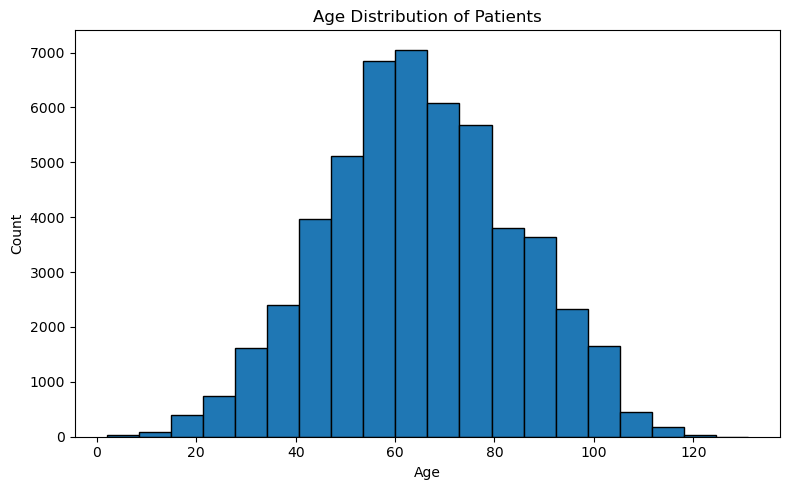

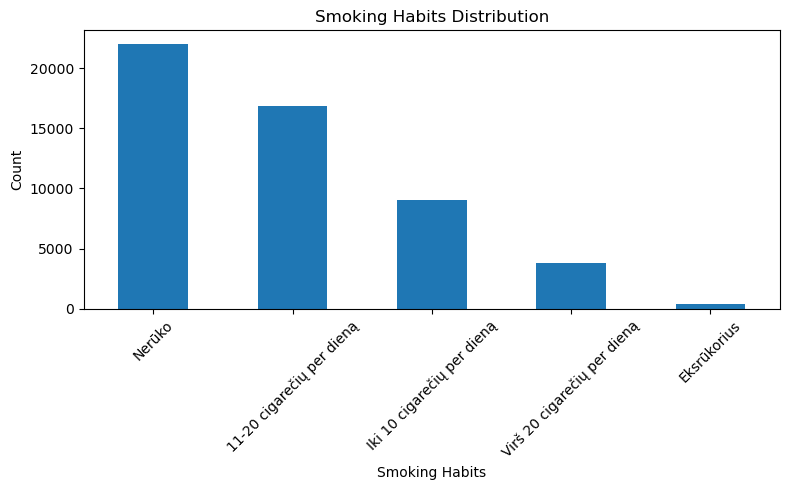

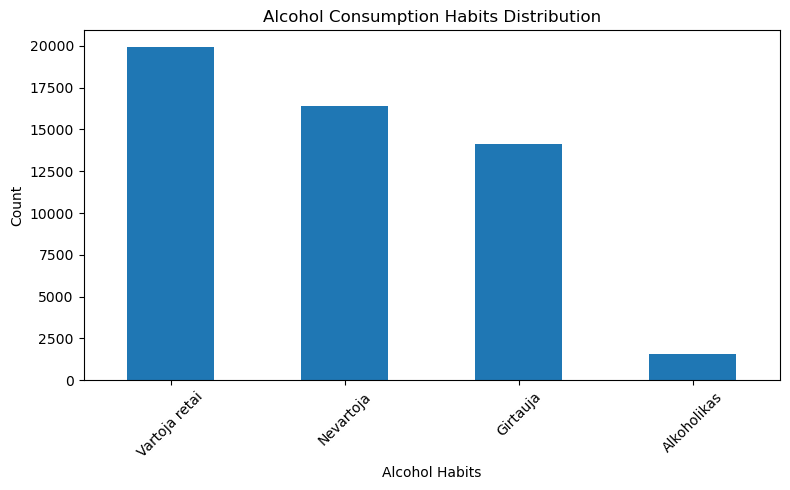

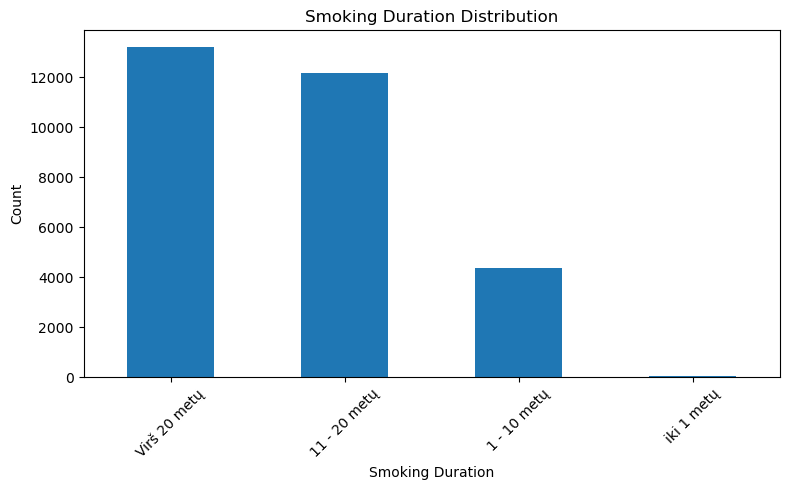

In [26]:
if "lytis" in cleaned_data.columns:
    plt.figure(figsize=(8, 5))
    cleaned_data["lytis"].value_counts().plot(kind="bar")
    plt.title("Distribution by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plt.figure(figsize=(8, 5))
cleaned_data["amzius"].dropna().plot(kind="hist", bins=20, edgecolor="black")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
cleaned_data["rukymas_reiksme"].value_counts().plot(kind="bar")
plt.title("Smoking Habits Distribution")
plt.xlabel("Smoking Habits")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
cleaned_data["alkoholis_reiksme"].value_counts().plot(kind="bar")
plt.title("Alcohol Consumption Habits Distribution")
plt.xlabel("Alcohol Habits")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


if "rukymo_stazas_reiksme" in cleaned_data.columns:
    plt.figure(figsize=(8, 5))
    cleaned_data["rukymo_stazas_reiksme"].value_counts().plot(kind="bar")
    plt.title("Smoking Duration Distribution")
    plt.xlabel("Smoking Duration")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


data = pd.read_csv(r"C:\Users\Batia\Downloads\TubPacientoZalingasIprotis.csv")


data = data[['paciento_gim_metai', 'mirties_nuo_tub_d', 'paciento_lytis',
             'rukymas_reiksme', 'rukymo_stazas_reiksme', 'alkoholis_reiksme']]
data = data.dropna(subset=['paciento_gim_metai', 'mirties_nuo_tub_d'])


def calculate_lifespan(row):
    try:
        birth_date = pd.to_datetime(row['paciento_gim_metai'], errors='coerce')
        death_date = pd.to_datetime(row['mirties_nuo_tub_d'], errors='coerce')
        if pd.notnull(birth_date) and pd.notnull(death_date):
            return (death_date - birth_date).days / 365.25
        else:
            return np.nan
    except:
        return np.nan

data['lifespan'] = data.apply(calculate_lifespan, axis=1)
data = data.dropna(subset=['lifespan'])

data = pd.get_dummies(data, columns=['paciento_lytis', 'rukymas_reiksme', 'rukymo_stazas_reiksme', 'alkoholis_reiksme'], drop_first=True)

# Define features (X) and target (y)
X = data.drop(columns=['paciento_gim_metai', 'mirties_nuo_tub_d', 'lifespan'])
y = data['lifespan']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Function to predict lifespan for a new patient
def predict_lifespan(paciento_lytis, rukymas_reiksme, rukymo_stazas_reiksme, alkoholis_reiksme):
    # Create a single-row DataFrame for the new patient
    patient_data = pd.DataFrame({
        'paciento_lytis': [paciento_lytis],
        'rukymas_reiksme': [rukymas_reiksme],
        'rukymo_stazas_reiksme': [rukymo_stazas_reiksme],
        'alkoholis_reiksme': [alkoholis_reiksme]
    })

    
    patient_data = pd.get_dummies(patient_data, columns=['paciento_lytis', 'rukymas_reiksme', 'rukymo_stazas_reiksme', 'alkoholis_reiksme'], drop_first=True)

    # Align with training data columns
    patient_data = patient_data.reindex(columns=X.columns, fill_value=0)

    # Predict lifespan
    predicted_lifespan = model.predict(patient_data)[0]
    return predicted_lifespan


example_lifespan = predict_lifespan(paciento_lytis='Male', rukymas_reiksme='11-20 cigarečių per dieną', rukymo_stazas_reiksme='11 - 20 metų', alkoholis_reiksme='Vartoja retai')
print(f"Predicted Lifespan: {example_lifespan} years")


C:\Users\Batia\AppData\Local\Temp\ipykernel_11196\2750975764.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\Batia\Downloads\TubPacientoZalingasIprotis.csv")


Root Mean Squared Error (RMSE): 12.091557227740452
Predicted Lifespan: 59.6467390469444 years
